# Understanding CNN basics

In [1]:
#basic libraries
import matplotlib.pyplot as plt
from numpy import asarray
import numpy as np
import pandas as pd
import cv2 as cv
#importing Keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Activation
#colab don't support cv2.imshow method, so importing cv2_imshow
from google.colab.patches import cv2_imshow 
#for image pre-processing
from skimage import io

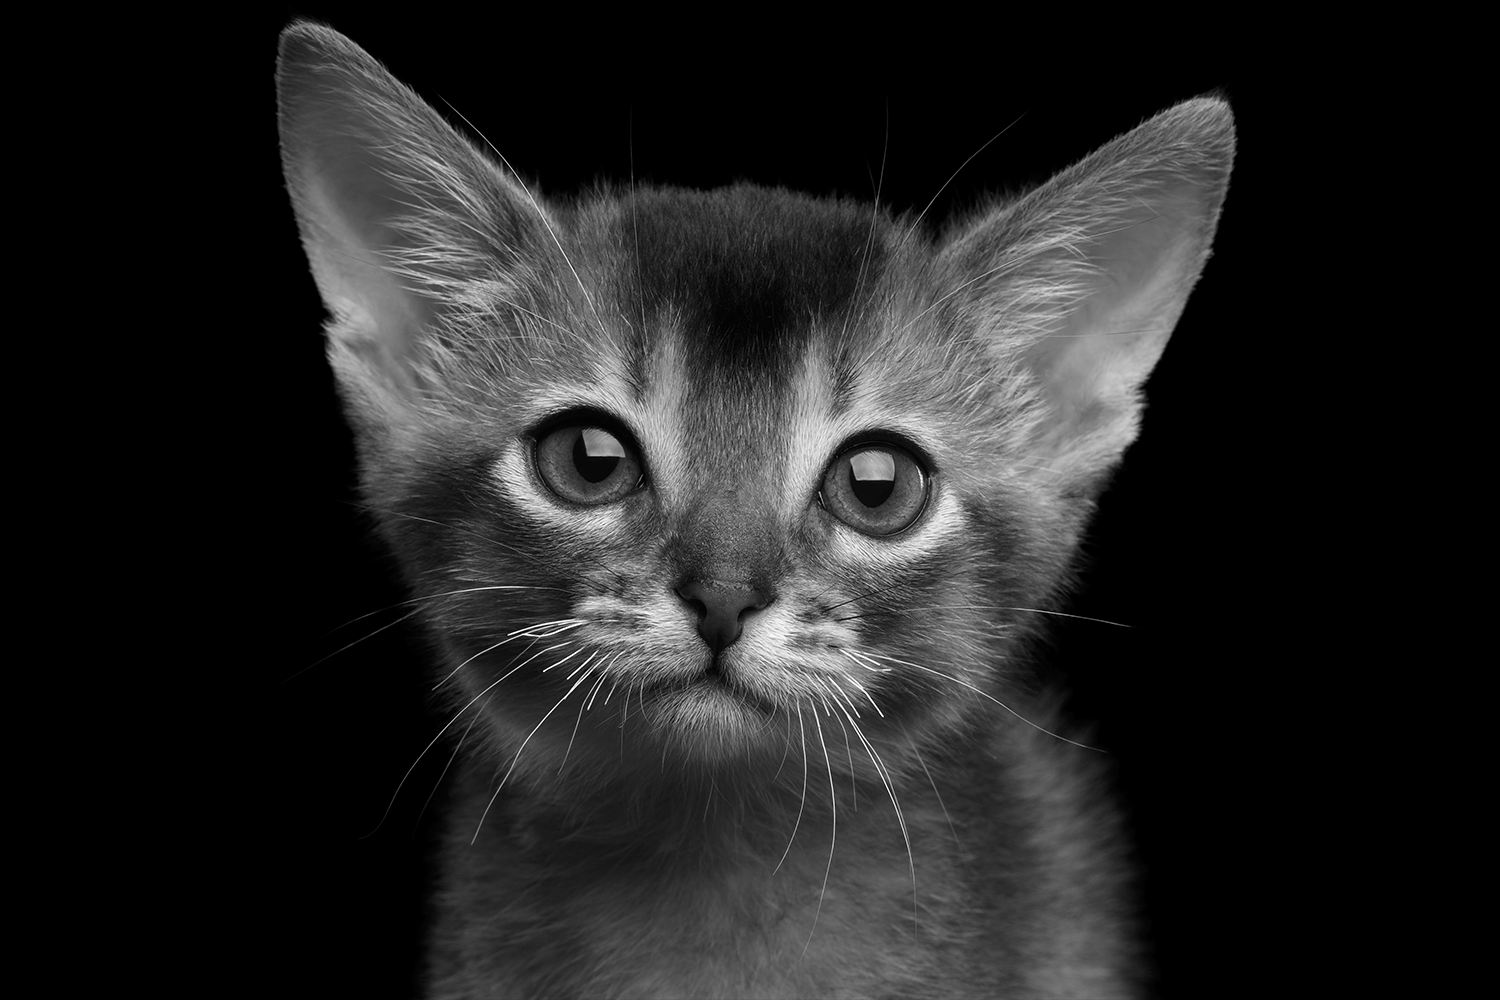

In [6]:
#Getting an input from the website with mentioned URL below
url = "https://images.squarespace-cdn.com/content/v1/582d50986b8f5ba33e73b9c8/1526950762437-USL0U2LQPNL2YQ53XXKO/Abby+kitten.png"
#reading the image
image = io.imread(url)
#converting image from BGR to RGB
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
#converting RGB to grayscale image
gray_image = cv.cvtColor(image_2, cv.COLOR_RGB2GRAY)
#display the image
cv2_imshow(gray_image)

In [7]:
gray_image.shape


(1000, 1500)

models need a square input so n*n , we will convert the picture to square one

In [9]:
width = 512
height = 512
dim = (width, height)
# resize image
img = cv.resize(gray_image, dim, interpolation = cv.INTER_AREA)
img.shape

(512, 512)

Feed image to keras
The first argument is the number of the images as batches and the last argument is the ‘1’ which means it is a grayscale image.

In [13]:
img_batch = img.reshape(1, img.shape[0], img.shape[1], 1)
img_batch.shape
#img_batch.shape[1:]

(1, 512, 512, 1)

creating a model with 1 layer and kernel size 15*15

In [14]:
model1 = Sequential()
model1.add(Conv2D(1, (15,15), padding= 'valid', input_shape =img_batch.shape[1:]))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 498, 498, 1)       226       
                                                                 
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________


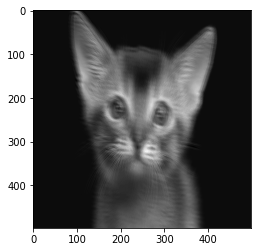

In [16]:
conv_img = model1.predict(img_batch)
conv_img_show = conv_img.reshape(conv_img.shape[1],
                                 conv_img.shape[2])
plt.imshow(conv_img_show, cmap = 'gray')
plt.show()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 498, 498, 1)       226       
                                                                 
 activation_3 (Activation)   (None, 498, 498, 1)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 249, 249, 1)      0         
 2D)                                                             
                                                                 
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________


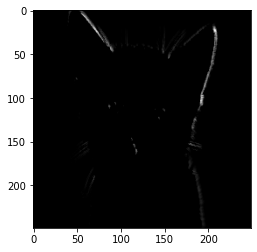

In [20]:
model2 = Sequential()
model2.add(Conv2D(1, (15,15), padding= 'valid', input_shape = img_batch.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.summary()
conv_img = model2.predict(img_batch)
conv_img_show = conv_img.reshape(conv_img.shape[1], conv_img.shape[2])
plt.imshow(conv_img_show, cmap = 'gray')
plt.show()